In [2]:
import os
import pandas as pd
import numpy as np
import torch
from collections import Counter
import matplotlib.pyplot as plt
from nilearn.plotting import plot_connectome
from collections import Counter, defaultdict
import seaborn as sns


Frequency Band Dominance Across Patients:
Beta       -> 27 patients
Alpha      -> 13 patients
Theta      -> 13 patients
Delta      -> 9 patients
Gammalow   -> 9 patients


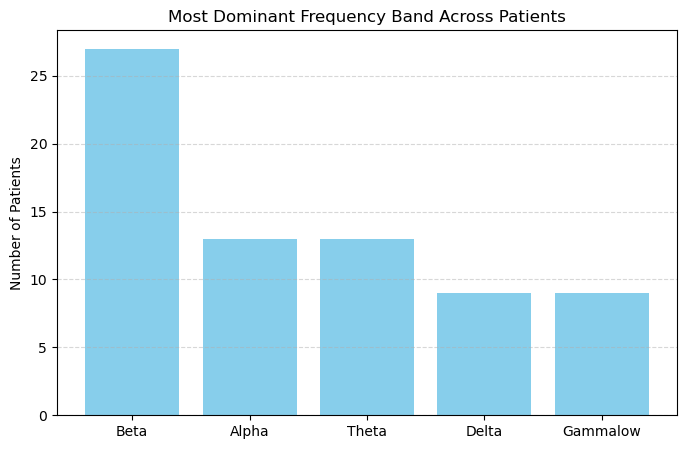

In [26]:
# Setup
base_directory = "/Users/sogandghasemi/Documents/uni/Stage/project/data"
frequency_bands = ['delta', 'gammalow', 'alpha', 'beta', 'broadband', 'theta']
num_bands = len(frequency_bands)

# Results
per_patient_band_averages = {}  # patient_id -> {band: avg}
dominant_band_counts = Counter()

# Loop over patients P8 to P276
for patient_id in range(8, 277):
    patient_dir = os.path.join(base_directory, f"P{patient_id}")
    if not os.path.exists(patient_dir):
        continue

    band_means = {}

    try:
        for band in frequency_bands:
            file_path = os.path.join(patient_dir, f"{band}_connectivity.csv")
            if not os.path.exists(file_path):
                continue

            matrix = pd.read_csv(file_path, header=0, index_col=0).values.astype(np.float32)
            tensor = torch.tensor(matrix, dtype=torch.float32)
            max_val = torch.max(tensor)
            normalized_tensor = tensor / max_val if max_val > 0 else tensor

            mean_val = normalized_tensor.mean().item()
            band_means[band] = mean_val

        if band_means:
            per_patient_band_averages[patient_id] = band_means
            # Identify the band with the highest mean
            top_band = max(band_means.items(), key=lambda x: x[1])[0]
            dominant_band_counts[top_band] += 1

    except Exception as e:
        print(f"Error in patient {patient_id}: {e}")

# Sort by most frequent dominant band
sorted_dominance = dominant_band_counts.most_common()

# Display ranking
print("\nFrequency Band Dominance Across Patients:")
for band, count in sorted_dominance:
    print(f"{band.capitalize():<10} -> {count} patients")

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar([b.capitalize() for b, _ in sorted_dominance],
        [c for _, c in sorted_dominance], color='skyblue')
plt.title("Most Dominant Frequency Band Across Patients")
plt.ylabel("Number of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [20]:
region_labels = [
    'BanksSTS-L', 'BanksSTS-R',
    'CaudalAnteriorCingulate-L', 'CaudalAnteriorCingulate-R',
    'CaudalMiddleFrontal-L', 'CaudalMiddleFrontal-R',
    'Cuneus-L', 'Cuneus-R',
    'Entorhinal-L', 'Entorhinal-R',
    'FrontalPole-L', 'FrontalPole-R',
    'Fusiform-L', 'Fusiform-R',
    'InferiorParietal-L', 'InferiorParietal-R',
    'InferiorTemporal-L', 'InferiorTemporal-R',
    'Insula-L', 'Insula-R',
    'IsthmusCingulate-L', 'IsthmusCingulate-R',
    'LateralOccipital-L', 'LateralOccipital-R',
    'LateralOrbitofrontal-L', 'LateralOrbitofrontal-R',
    'Lingual-L', 'Lingual-R',
    'MedialOrbitofrontal-L', 'MedialOrbitofrontal-R',
    'MiddleTemporal-L', 'MiddleTemporal-R',
    'Paracentral-Lobule-L', 'Paracentral-Lobule-R',
    'Parahippocampal-L', 'Parahippocampal-R',
    'ParsOpercularis-L', 'ParsOpercularis-R',
    'ParsOrbitalis-L', 'ParsOrbitalis-R',
    'ParsTriangularis-L', 'ParsTriangularis-R',
    'Pericalcarine-L', 'Pericalcarine-R',
    'Postcentral-L', 'Postcentral-R',
    'PosteriorCingulate-L', 'PosteriorCingulate-R',
    'Precentral-L', 'Precentral-R',
    'Precuneus-L', 'Precuneus-R',
    'RostralAnteriorCingulate-L', 'RostralAnteriorCingulate-R',
    'RostralMiddleFrontal-L', 'RostralMiddleFrontal-R',
    'SuperiorFrontal-L', 'SuperiorFrontal-R',
    'SuperiorParietal-L', 'SuperiorParietal-R',
    'SuperiorTemporal-L', 'SuperiorTemporal-R',
    'Supramarginal-L', 'Supramarginal-R',
    'TemporalPole-L', 'TemporalPole-R',
    'TransverseTemporal-L', 'TransverseTemporal-R'
]


In [21]:
desikan_killiany_mni_coords = np.array([
    [-55, -57,  19], [-50, -85,  -5],  # BanksSTS-L, BanksSTS-R
    [-4,  39,   7], [  4,  39,   7],   # CaudalAnteriorCingulate-L/R
    [-32, 22,  51], [ 32,  22,  51],   # CaudalMiddleFrontal-L/R
    [-5, -83,  27], [  5, -83,  27],   # Cuneus-L/R
    [-24, -7, -29], [ 24,  -7, -29],   # Entorhinal-L/R
    [-33, -45, -17], [33, -45, -17],   # FrontalPole-L/R
    [-43, -68, 34], [ 43, -68,  34],   # Fusiform-L/R
    [-50, -18, -23], [50, -18, -23],   # InferiorParietal-L/R
    [-35, 13,   3], [ 35,  13,   3],   # InferiorTemporal-L/R
    [-6, -32,  32], [  6, -32,  32],   # Insula-L/R
    [-44, -83,   0], [44, -83,   0],   # IsthmusCingulate-L/R
    [-30, 46, -14], [30,  46, -14],    # LateralOccipital-L/R
    [-13, -83, -13], [13, -83, -13],   # LateralOrbitofrontal-L/R
    [-11, 51, -19], [11,  51, -19],    # Lingual-L/R
    [-60, -28,  -3], [60, -28,  -3],   # MedialOrbitofrontal-L/R
    [-23, -34, -19], [23, -34, -19],   # MiddleTemporal-L/R
    [-7, -24,  67], [  7, -24,  67],   # Paracentral-Lobule-L/R
    [-49, 10,  18], [49,  10,  18],    # Parahippocampal-L/R
    [-37, 45,  -5], [37,  45,  -5],    # ParsOpercularis-L/R
    [-46, 38,  12], [46,  38,  12],    # ParsOrbitalis-L/R
    [-7, -97,   9], [  7, -97,   9],   # ParsTriangularis-L/R
    [-42, -25, 60], [42, -25,  60],    # Pericalcarine-L/R
    [-6, -18,  40], [ 6, -18,  40],    # Postcentral-L/R
    [-38, -7,  59], [38,  -7,  59],    # PosteriorCingulate-L/R
    [-10, -50, 49], [10, -50,  49],    # Precentral-L/R
    [-3,  37,  13], [ 3,  37,  13],    # Precuneus-L/R
    [-29, 46,  33], [29,  46,  33],    # RostralAnteriorCingulate-L/R
    [-7,  20,  56], [ 7,  20,  56],    # RostralMiddleFrontal-L/R
    [-20, -68, 50], [20, -68,  50],    # SuperiorFrontal-L/R
    [-52, -22,  7], [52, -22,   7],    # SuperiorParietal-L/R
    [-50, -40, 34], [50, -40,  34],    # SuperiorTemporal-L/R
    [8,  56,  10], [-8,  56,  10],     # Supramarginal-L/R
    [5,  -8, -24], [-5,  -8, -24],     # TemporalPole-L/R
    [-43, -17, 10], [43, -17,  10]     # TransverseTemporal-L/R
])



Top 5 connections in: Patient 8 — Delta Band
Entorhinal-R ↔ FrontalPole-R: 0.2530
FrontalPole-R ↔ TemporalPole-R: 0.2340
FrontalPole-R ↔ LateralOrbitofrontal-R: 0.2280
CaudalMiddleFrontal-R ↔ RostralAnteriorCingulate-R: 0.2197
Entorhinal-R ↔ ParsOrbitalis-L: 0.2149

Top 5 connections in: Patient 8 — Gammalow Band
ParsOrbitalis-L ↔ ParsTriangularis-L: 0.3259
ParsOrbitalis-L ↔ RostralMiddleFrontal-L: 0.2946
ParsTriangularis-L ↔ RostralMiddleFrontal-L: 0.2926
ParsOpercularis-L ↔ ParsTriangularis-L: 0.2814
ParsOpercularis-L ↔ RostralMiddleFrontal-L: 0.2795

Top 5 connections in: Patient 8 — Alpha Band
CaudalMiddleFrontal-L ↔ ParsTriangularis-L: 0.2599
CaudalMiddleFrontal-L ↔ ParsOrbitalis-L: 0.2569
CaudalMiddleFrontal-L ↔ ParsOpercularis-L: 0.2443
ParsTriangularis-L ↔ Precentral-L: 0.2410
ParsOpercularis-L ↔ ParsTriangularis-L: 0.2381

Top 5 connections in: Patient 8 — Beta Band
CaudalMiddleFrontal-L ↔ ParsTriangularis-L: 0.5438
CaudalMiddleFrontal-L ↔ ParsOpercularis-L: 0.5381
ParsTriang

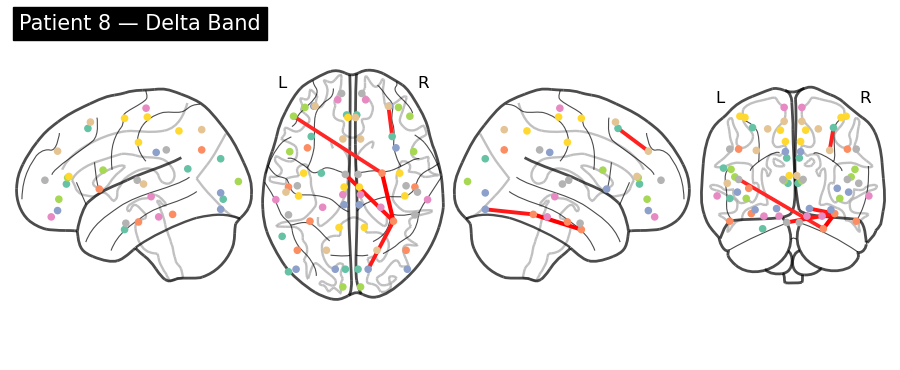

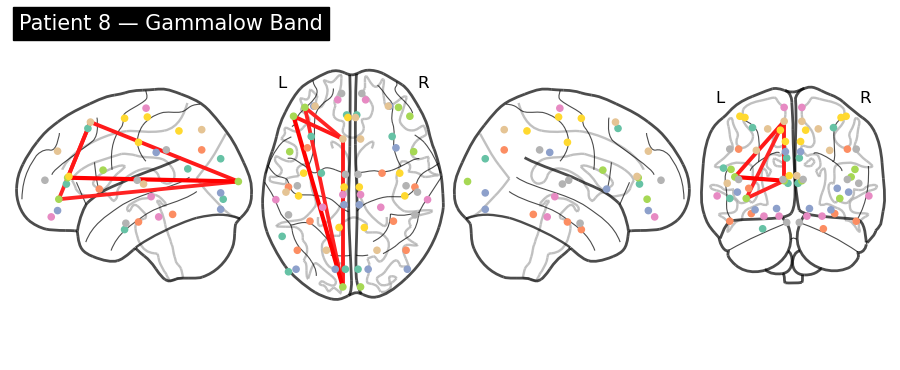

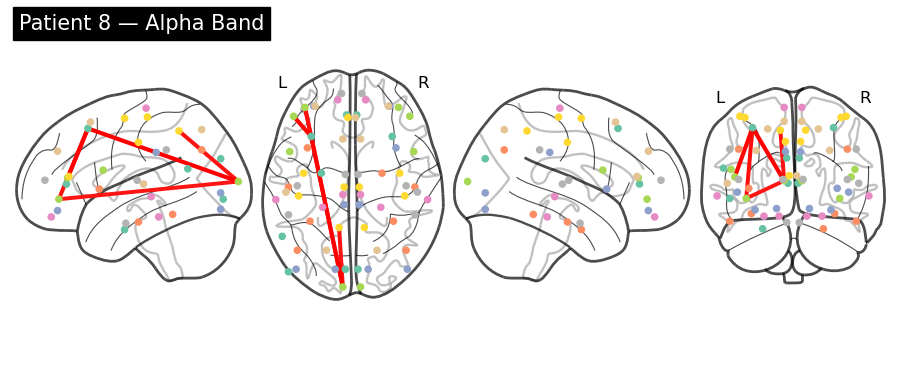

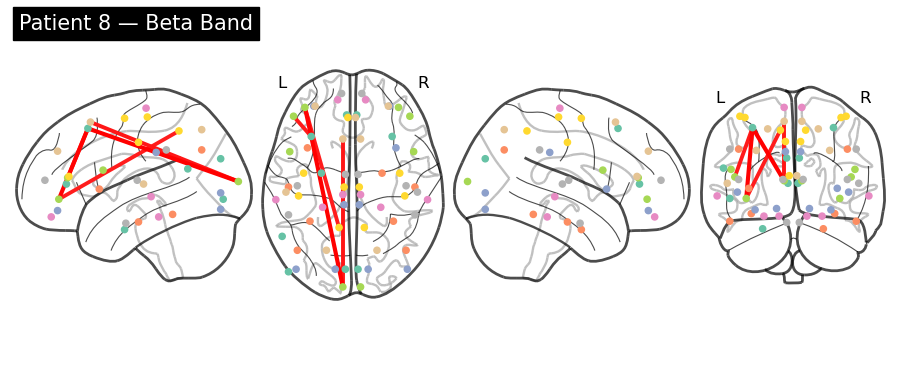

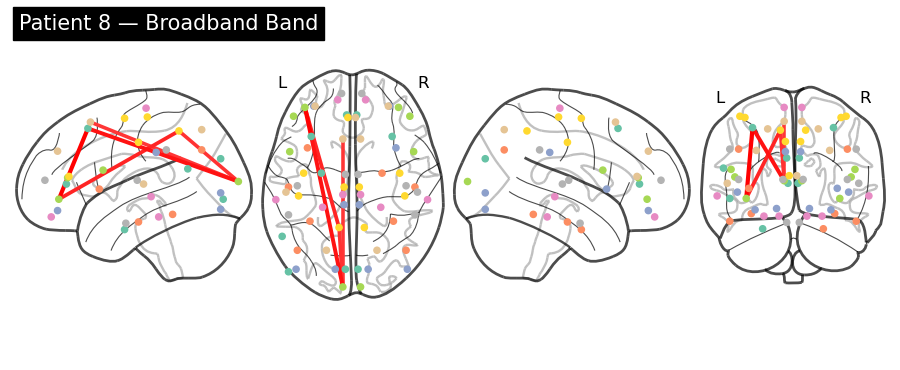

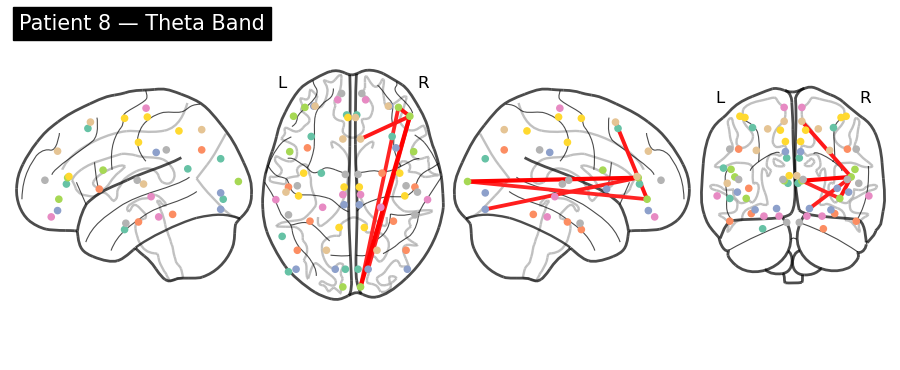

In [27]:
# --- Plotting function ---
def plot_top_connectivity(matrix, coords, region_names, top_k=5, title=""):
    np.fill_diagonal(matrix, 0)

    triu_indices = np.triu_indices_from(matrix, k=1)
    flattened = matrix[triu_indices]
    top_idx = np.argsort(flattened)[-top_k:][::-1]
    top_pairs = list(zip(triu_indices[0][top_idx], triu_indices[1][top_idx]))

    print(f"\nTop {top_k} connections in: {title}")
    for i, j in top_pairs:
        print(f"{region_names[i]} ↔ {region_names[j]}: {matrix[i, j]:.4f}")

    sparse = np.zeros_like(matrix)
    for i, j in top_pairs:
        sparse[i, j] = matrix[i, j]
        sparse[j, i] = matrix[i, j]

    plot_connectome(sparse, coords, edge_threshold='0%', node_size=20,
                    title=title, display_mode='lzry')

# --- Load and plot for all bands ---
base_directory = "/Users/sogandghasemi/Documents/uni/Stage/project/data"
frequency_bands = ['delta', 'gammalow', 'alpha', 'beta', 'broadband', 'theta']
patient_id = 8
patient_dir = os.path.join(base_directory, f"p{patient_id}")

for band in frequency_bands:
    file_path = os.path.join(patient_dir, f"{band}_connectivity.csv")
    if not os.path.exists(file_path):
        print(f"Skipping {band} — file not found.")
        continue

    matrix = pd.read_csv(file_path, index_col=0).values.astype(np.float32)
    tensor = torch.tensor(matrix)
    max_val = torch.max(tensor)
    norm_matrix = (tensor / max_val).numpy() if max_val > 0 else tensor.numpy()

    plot_top_connectivity(norm_matrix, desikan_killiany_mni_coords, region_labels,
                          top_k=5, title=f"Patient {patient_id} — {band.capitalize()} Band")

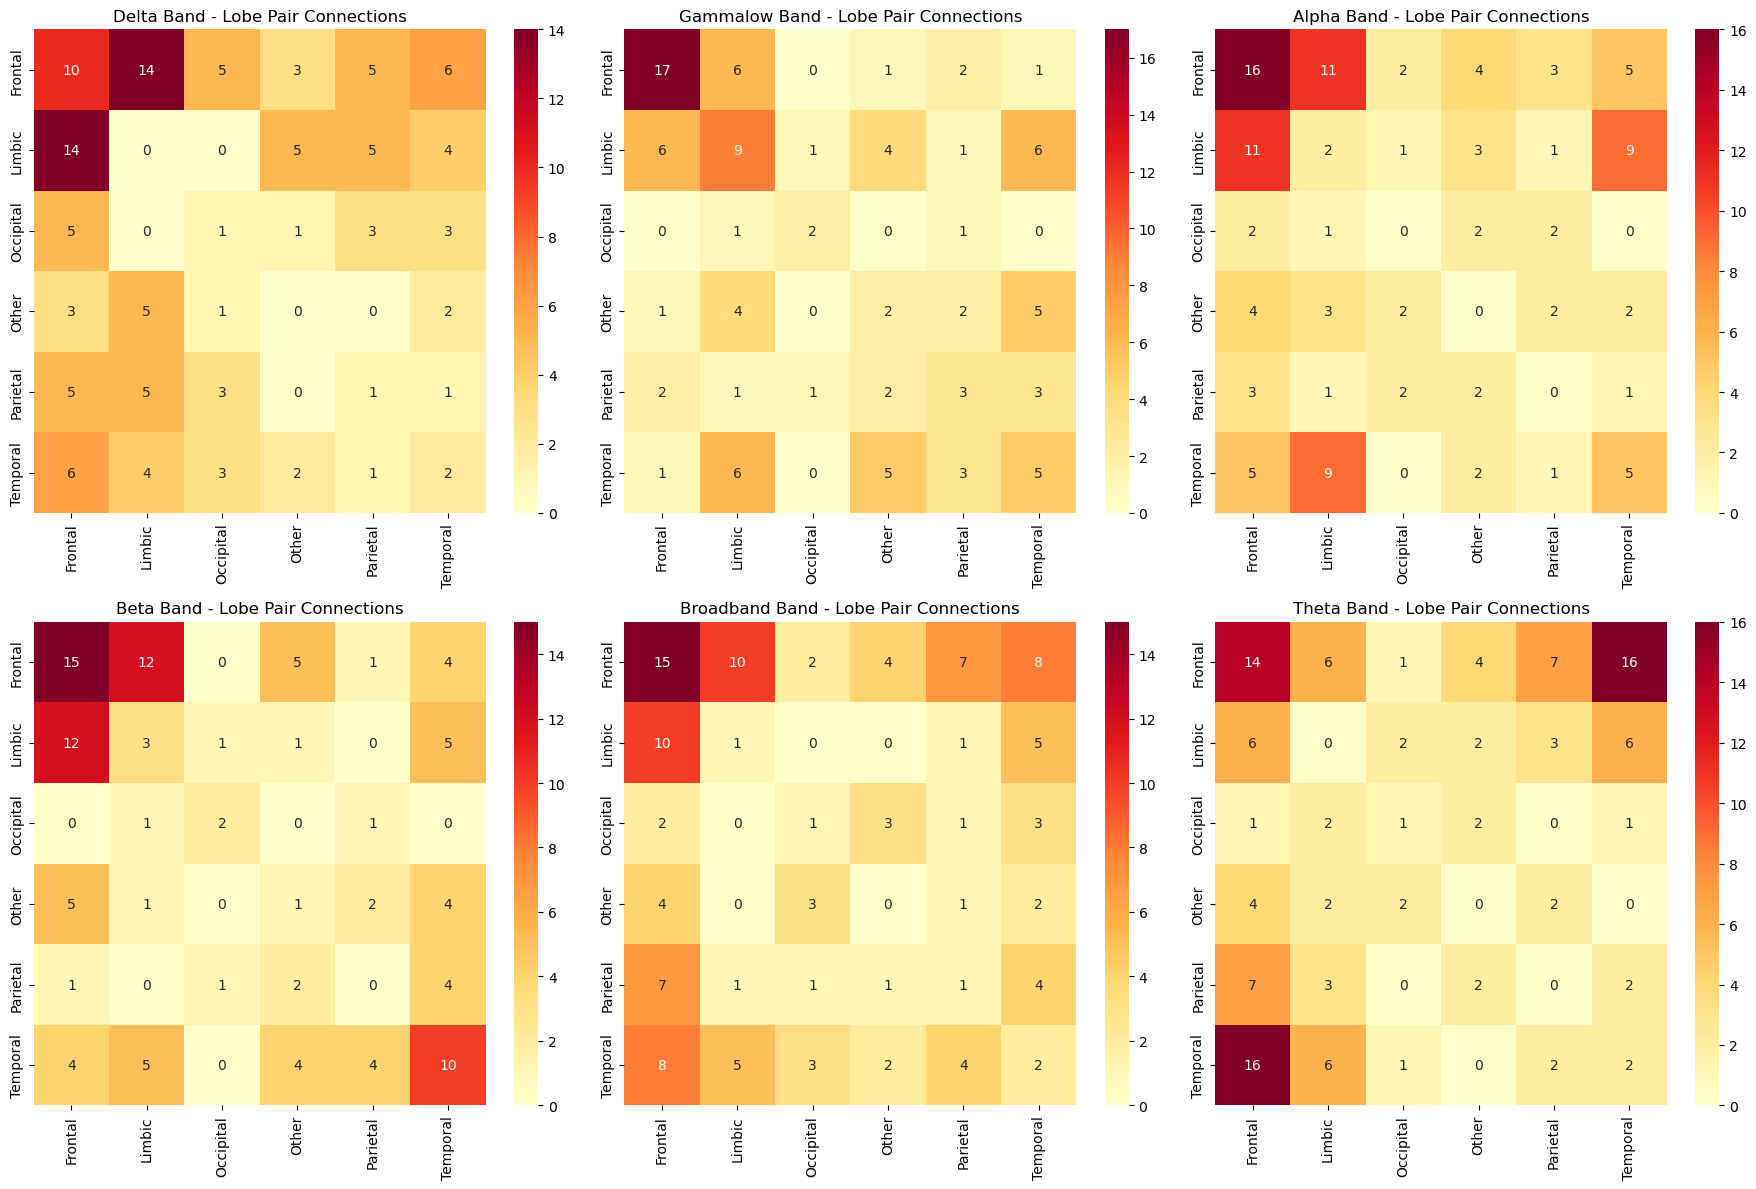

In [31]:
base_path = "/Users/sogandghasemi/Documents/uni/Stage/project/data"
frequency_bands = ['delta', 'gammalow', 'alpha', 'beta', 'broadband', 'theta']


# === Lobe mapping function ===
def get_lobe(region):
    r = region.lower()
    if 'frontal' in r or 'precentral' in r or 'pars' in r or 'rostral' in r:
        return 'Frontal'
    elif 'temporal' in r:
        return 'Temporal'
    elif 'parietal' in r or 'postcentral' in r or 'precuneus' in r or 'supramarginal' in r:
        return 'Parietal'
    elif 'occipital' in r or 'pericalcarine' in r or 'cuneus' in r or 'lingual' in r:
        return 'Occipital'
    elif 'cingulate' in r or 'entorhinal' in r or 'parahippocampal' in r or 'insula' in r:
        return 'Limbic'
    else:
        return 'Other'

# === Initialize connection counters ===
connection_counts_by_band = defaultdict(Counter)

# === Scan all patient folders ===
for folder in os.listdir(base_path):
    if not folder.startswith("p"):
        continue
    patient_path = os.path.join(base_path, folder)
    
    for band in frequency_bands:
        file_path = os.path.join(patient_path, f"{band}_connectivity.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path, index_col=0)
        matrix = df.to_numpy(dtype=np.float32)
        np.fill_diagonal(matrix, 0)
        max_val = matrix.max()
        if max_val > 0:
            matrix = matrix / max_val

        # Round values to 3 decimals
        matrix = np.round(matrix, 3)

        # Find the single highest connection in the upper triangle
        triu = np.triu_indices_from(matrix, k=1)
        flat_vals = matrix[triu]
        if flat_vals.size == 0:
            continue
        max_index = np.argmax(flat_vals)
        i, j = triu[0][max_index], triu[1][max_index]
        connection_counts_by_band[band][(i, j)] += 1

# === Aggregate connections by lobe pair ===
lobe_pairs_by_band = {band: Counter() for band in frequency_bands}
for band in frequency_bands:
    for (i, j), count in connection_counts_by_band[band].items():
        lobe_i = get_lobe(region_labels[i])
        lobe_j = get_lobe(region_labels[j])
        if lobe_i > lobe_j:
            lobe_i, lobe_j = lobe_j, lobe_i
        lobe_pairs_by_band[band][(lobe_i, lobe_j)] += count

# === Unique lobes for matrix construction ===
all_lobes = sorted(set(get_lobe(r) for r in region_labels))

# === Plot lobe heatmaps ===
plt.figure(figsize=(18, 12))
for idx, band in enumerate(frequency_bands):
    plt.subplot(2, 3, idx+1)
    matrix = np.zeros((len(all_lobes), len(all_lobes)))
    
    for (lobe_i, lobe_j), count in lobe_pairs_by_band[band].items():
        i = all_lobes.index(lobe_i)
        j = all_lobes.index(lobe_j)
        matrix[i, j] = count
        matrix[j, i] = count  # symmetric

    sns.heatmap(matrix, annot=True, fmt='.0f', cmap='YlOrRd',
                xticklabels=all_lobes, yticklabels=all_lobes)
    plt.title(f"{band.capitalize()} Band - Lobe Pair Connections")

plt.tight_layout()
plt.savefig("lobe_connections_across_patients.png", dpi=300)
plt.show()